In [35]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import mplleaflet
import seaborn as sns

In [36]:
sns.set(style='ticks',color_codes=True,font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

In [37]:
from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p
%matplotlib inline

In [38]:
train = pd.read_csv('housing_train.csv')
train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [39]:
train_Id = train['id']
train.drop('id',axis=1,inplace = True)

# Exploratory Data Analysis

In [40]:
train.shape

(265190, 21)

In [41]:
train.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,263771.000000,263771.000000
mean,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.208855,-92.398149
std,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.659648,17.370780
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.508500,-104.704000
50%,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.984900,-86.478300
75%,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.168400,-81.284600
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [42]:
def analysis(df, target):
    instance = df.shape[0]
    types=df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.T.apply(pd.Series.unique,1)
    nulls= df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(pd.Series.nunique)
    null_perc = (df.isnull().sum()/instance)*100
    skewness = df.skew()
    kurtosis = df.kurt()
    
    corr = df.corr()[target]
    str = pd.concat([types, counts,uniques, nulls,distincts, null_perc, skewness, kurtosis, corr], axis = 1, sort=False)
    corr_col = 'corr '  + target
    cols = ['types', 'counts','uniques', 'nulls','distincts', 'null_perc', 'skewness', 'kurtosis', corr_col ]
    str.columns = cols
    return str

In [43]:
details = analysis(train,'price')
details

,types,counts,uniques,nulls,distincts,null_perc,skewness,kurtosis,corr price
url,object,265190,[https://bham.craigslist.org/apa/d/birmingham-...,0,265190,0.000000,NaN,NaN,NaN
region,object,265190,"[birmingham, huntsville / decatur, dothan, mob...",0,298,0.000000,NaN,NaN,NaN
region_url,object,265190,"[https://bham.craigslist.org, https://huntsvil...",0,305,0.000000,NaN,NaN,NaN
price,int64,265190,"[1195, 1120, 825, 800, 785, 900, 925, 1085, 12...",0,3753,0.000000,514.780933,265062.432268,1.000000
type,object,265190,"[apartment, house, manufactured, townhouse, co...",0,12,0.000000,NaN,NaN,NaN
sqfeet,int64,265190,"[1908, 1319, 1133, 927, 1047, 1298, 1350, 2308...",0,3037,0.000000,340.467541,120492.280883,0.000006
beds,int64,265190,"[3, 1, 2, 4, 0, 5, 6, 7, 8, 1000, 1100]",0,11,0.000000,272.959497,79164.809146,0.000062
baths,float64,265190,"[2.0, 1.5, 1.0, 2.5, 0.0, 3.0, 3.5, 4.0, 4.5, ...",0,19,0.000000,13.323474,1427.809871,0.000151
cats_allowed,int64,265190,"[1, 0]",0,2,0.000000,-0.962499,-1.073604,0.001206
dogs_allowed,int64,265190,"[1, 0]",0,2,0.000000,-0.855037,-1.268921,0.001230


#### Types of data
Int : 10  
float : 3   
object : 9

#### Highly skewed and heavy tail distributed features:
price  
beds   
sqfeet  
bath   
electric_vehicle_charge  
possibly outliers  
We may apply boxcox or log transformation on the above feature

#### Features with Null values:
laundry_options  
parking_options	   
description  
lat  
long  
state  

No much correlation between independent features and target


In [44]:
# lets see our numerical features
num_features = [feat for feat in train.columns if train[feat].dtypes != 'O']
num_features

['price',
 'sqfeet',
 'beds',
 'baths',
 'cats_allowed',
 'dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished',
 'lat',
 'long']

In [45]:
# lets see our categorical features
cat_features = [feat for feat in train.columns if train[feat].dtypes == 'O']
cat_features

['url',
 'region',
 'region_url',
 'type',
 'laundry_options',
 'parking_options',
 'image_url',
 'description',
 'state']

### Analyzing Sqfeet feature

Text(0.5, 1.0, 'Skewness: 340.46754078957565 and Kurtosis: 120492.28088280167')

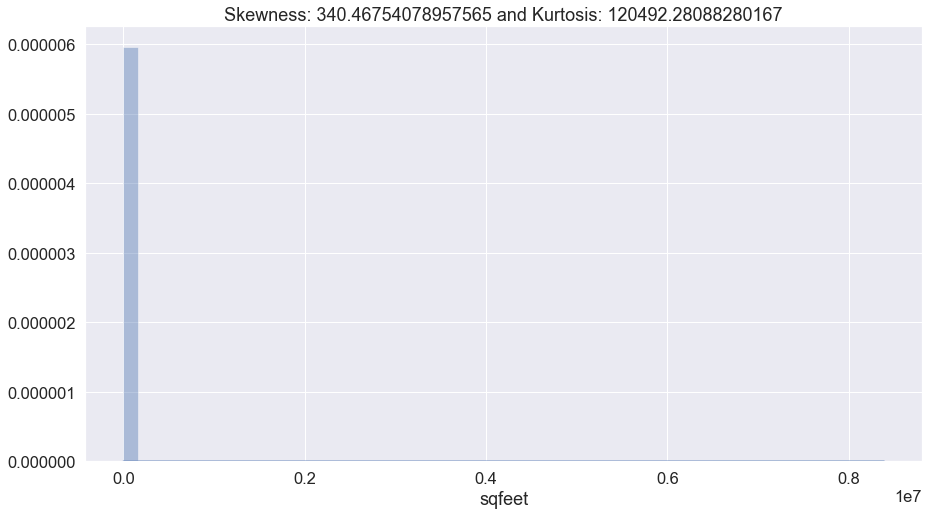

In [46]:
plt.figure(figsize=(15,8))

sns.distplot(train['sqfeet'],kde=True,norm_hist=True)
plt.title('Skewness: {} and Kurtosis: {}'.format(train['sqfeet'].skew(),train['sqfeet'].kurtosis()))

The feature sqfeet is highly positively skewed and has a heavy tailed distribution. There is high probability of outliers presence.

sqfeet Skewness: 340.468 and Kurtosis: 120492.281
price Skewness: 514.781 and Kurtosis: 265062.432


(265190, 21)

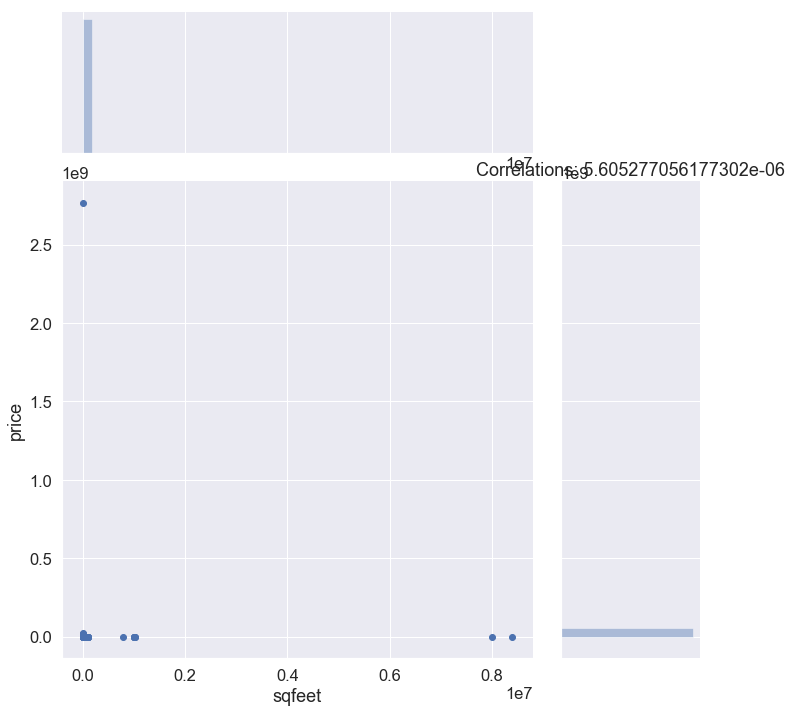

In [47]:
sns.jointplot(x=train['sqfeet'],y=train['price'],height=10,ratio=3)
print('sqfeet Skewness: {:.3f} and Kurtosis: {:.3f}'.format(train['sqfeet'].skew(),train['sqfeet'].kurtosis()))
print('price Skewness: {:.3f} and Kurtosis: {:.3f}'.format(train['price'].skew(),train['price'].kurtosis()))
plt.title('Correlations: {}'.format(train['sqfeet'].corr(train['price'])))
train.shape

sqfeet Skewness: 2.406 and Kurtosis: 14.664
price Skewness: 4.043 and Kurtosis: 46.989


(264971, 2)

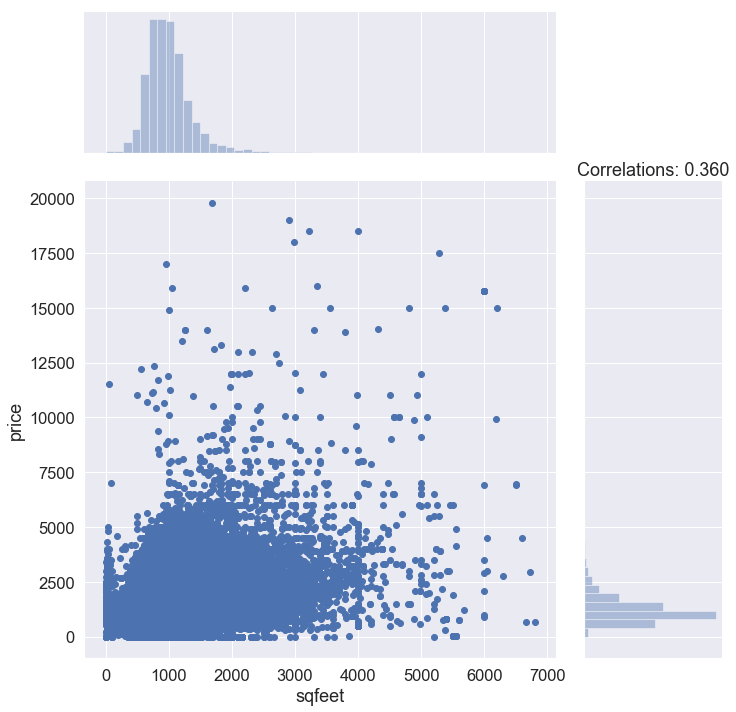

In [48]:
data=train[['price','sqfeet']]
data= data[data['sqfeet']<data['sqfeet'].quantile(0.9996)]
data = data[data['price']<data['price'].quantile(0.9996)]

sns.jointplot(x=data['sqfeet'],y=data['price'],height=10,ratio=3)
print('sqfeet Skewness: {:.3f} and Kurtosis: {:.3f}'.format(data['sqfeet'].skew(),data['sqfeet'].kurtosis()))
print('price Skewness: {:.3f} and Kurtosis: {:.3f}'.format(data['price'].skew(),data['price'].kurtosis()))
plt.title('Correlations: {:.3f}'.format(data['sqfeet'].corr(data['price'])))
data.shape


### Analyzing beds feature

In [49]:
train['beds'].value_counts()

2       120149
1        80527
3        46968
4         8177
0         7529
5         1590
6          185
7           40
8           22
1100         2
1000         1
Name: beds, dtype: int64

C:\Users\Neeraj Bhadani\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Skewness: 272.959 
Kurtosis: 79164.809


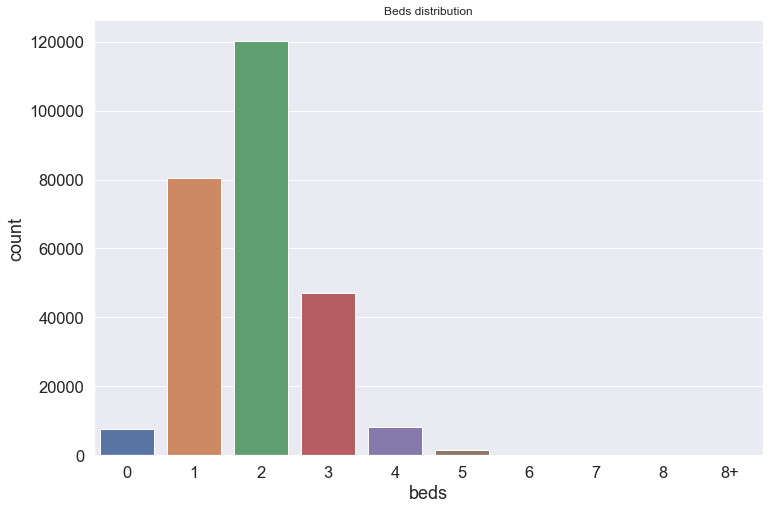

In [50]:
data = train[['beds','price']]
data.loc[data['beds']>8]='8+'
plt.figure(figsize=(12,8))
sns.countplot(data['beds'].astype('str').sort_values())
plt.title('Beds distribution',fontsize=12)
print('Skewness: {:.3f} \nKurtosis: {:.3f}'.format(train['beds'].skew(),train['beds'].kurtosis()))
plt.show()

price Skewness: 0.535 and Kurtosis: 0.924


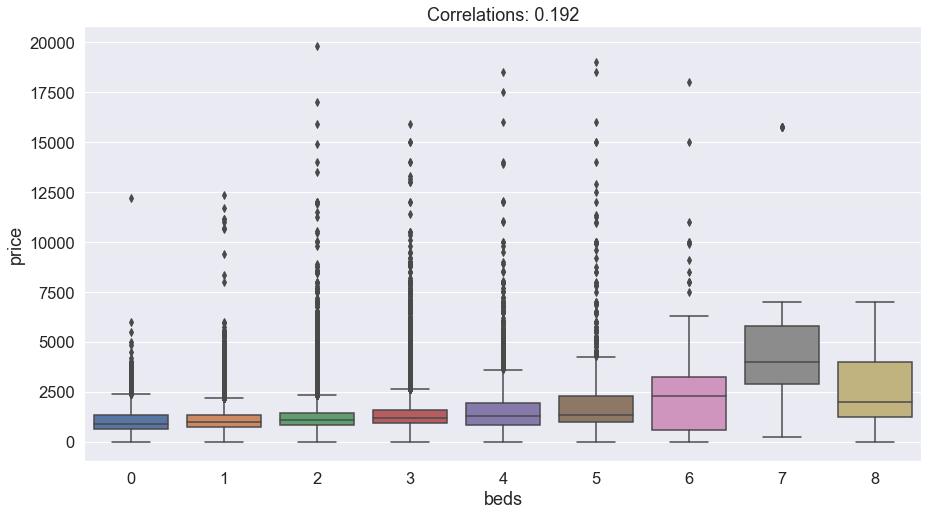

In [51]:
data = train[['beds','price']]
data = data[data['price']<data['price'].quantile(0.9996)]
data = data[data['beds']<10]
plt.figure(figsize=(15,8))
sns.boxplot(x='beds',y='price',data=data)
plt.title('Correlations: {:.3f}'.format(data['beds'].corr(data['price'])))
print('price Skewness: {:.3f} and Kurtosis: {:.3f}'.format(data['beds'].skew(),data['beds'].kurtosis()))

### Analyzing Bath Feature

In [52]:
train['baths'].value_counts()

1.0     136375
2.0      93726
1.5      18476
2.5       8185
3.0       4272
0.0       2045
4.0       1147
3.5        652
4.5        145
5.0        108
5.5         28
6.0         17
6.5          4
7.0          4
75.0         2
8.0          1
35.0         1
8.5          1
7.5          1
Name: baths, dtype: int64

Skewness: 13.323 
Kurtosis: 1427.810


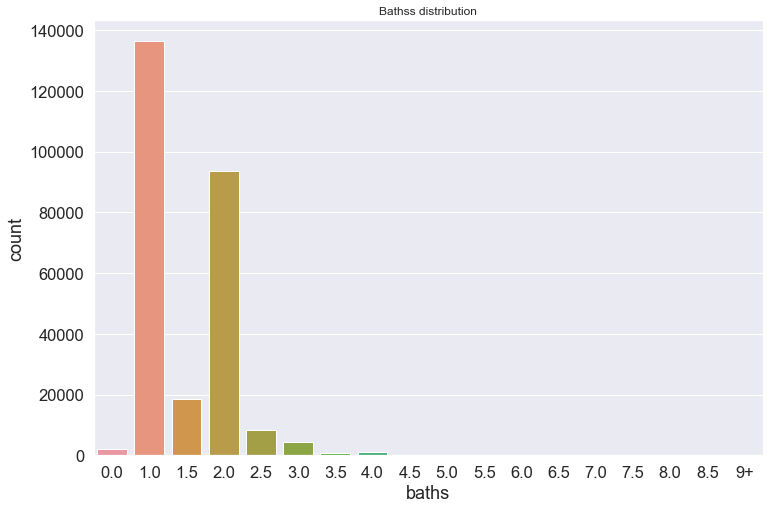

In [53]:
data = train[['baths','price']]
data.loc[data['baths']> 8.5]='9+'
plt.figure(figsize=(12,8))
sns.countplot(data['baths'].astype('str').sort_values())
plt.title('Bathss distribution',fontsize=12)
print('Skewness: {:.3f} \nKurtosis: {:.3f}'.format(train['baths'].skew(),train['baths'].kurtosis()))
plt.show()

price Skewness: 0.933 and Kurtosis: 1.977


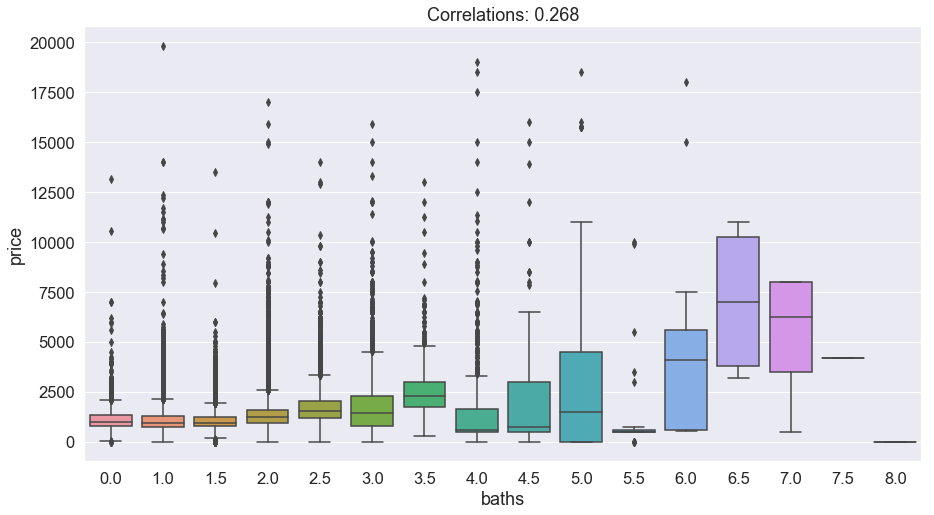

In [54]:
data = train[['baths','price']]
data = data[data['price']<data['price'].quantile(0.9996)]
data = data[data['baths']<10]
plt.figure(figsize=(15,8))
sns.boxplot(x='baths',y='price',data=data)
plt.title('Correlations: {:.3f}'.format(data['baths'].corr(data['price'])))
print('price Skewness: {:.3f} and Kurtosis: {:.3f}'.format(data['baths'].skew(),data['baths'].kurtosis()))

### Analyzing boolean features

In [55]:
bool_features = [x for x in num_features if train[x].nunique() < 3]
bool_features

['cats_allowed',
 'dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished']

In [56]:
# we will use median for skewed and mean for normally distributed feature
skewed_bool_features = ['wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished']

Correlation: 0.081


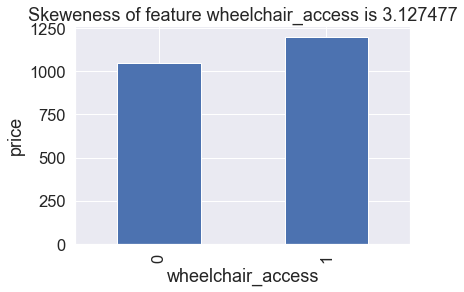

Correlation: 0.131


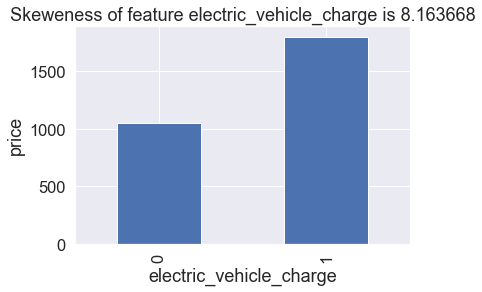

Correlation: 0.045


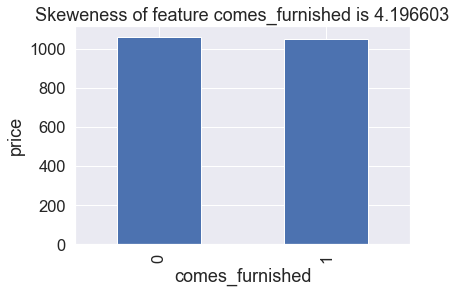

In [57]:
for feature in skewed_bool_features:
    data=train.copy()
    data = data[data['price']<data['price'].quantile(0.9996)]
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.title('Skeweness of feature {} is {:.6f}'.format(feature,data[feature].skew()))
    plt.ylabel('price')
    print('Correlation: {:.3f}'.format(data[feature].corr(data['price'])))
    plt.show()

Correlation: -0.048


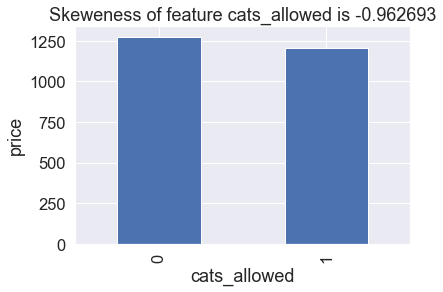

Correlation: -0.039


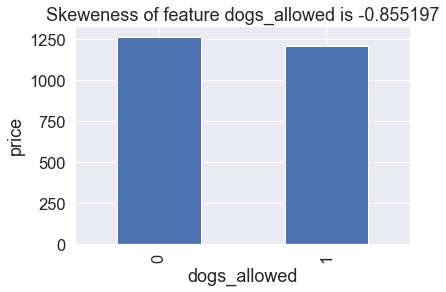

Correlation: -0.154


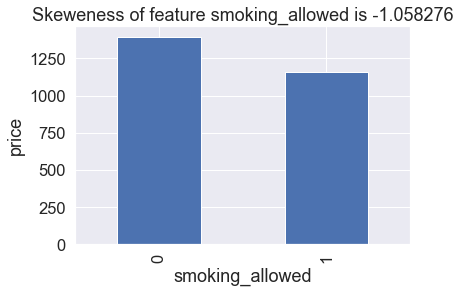

In [58]:
normal_bool_features=['cats_allowed',
 'dogs_allowed',
 'smoking_allowed']
for feature in normal_bool_features:
    data=train.copy()
    data = data[data['price']<data['price'].quantile(0.9996)]
    data.groupby(feature)['price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.title('Skeweness of feature {} is {:.6f}'.format(feature,data[feature].skew()))
    plt.ylabel('price')
    print('Correlation: {:.3f}'.format(data[feature].corr(data['price'])))
    plt.show()

### Analyzing categorical featuress

In [59]:
# lets see our categorical features
cat_features = [feat for feat in train.columns if train[feat].dtypes == 'O']
cat_features = [feat for feat in cat_features if 'url' not in feat]
cat_features

['region',
 'type',
 'laundry_options',
 'parking_options',
 'description',
 'state']

#### Analyzing Type Feature

In [60]:
train['type'].unique()

array(['apartment', 'house', 'manufactured', 'townhouse', 'condo',
       'duplex', 'flat', 'cottage/cabin', 'in-law', 'loft', 'land',
       'assisted living'], dtype=object)

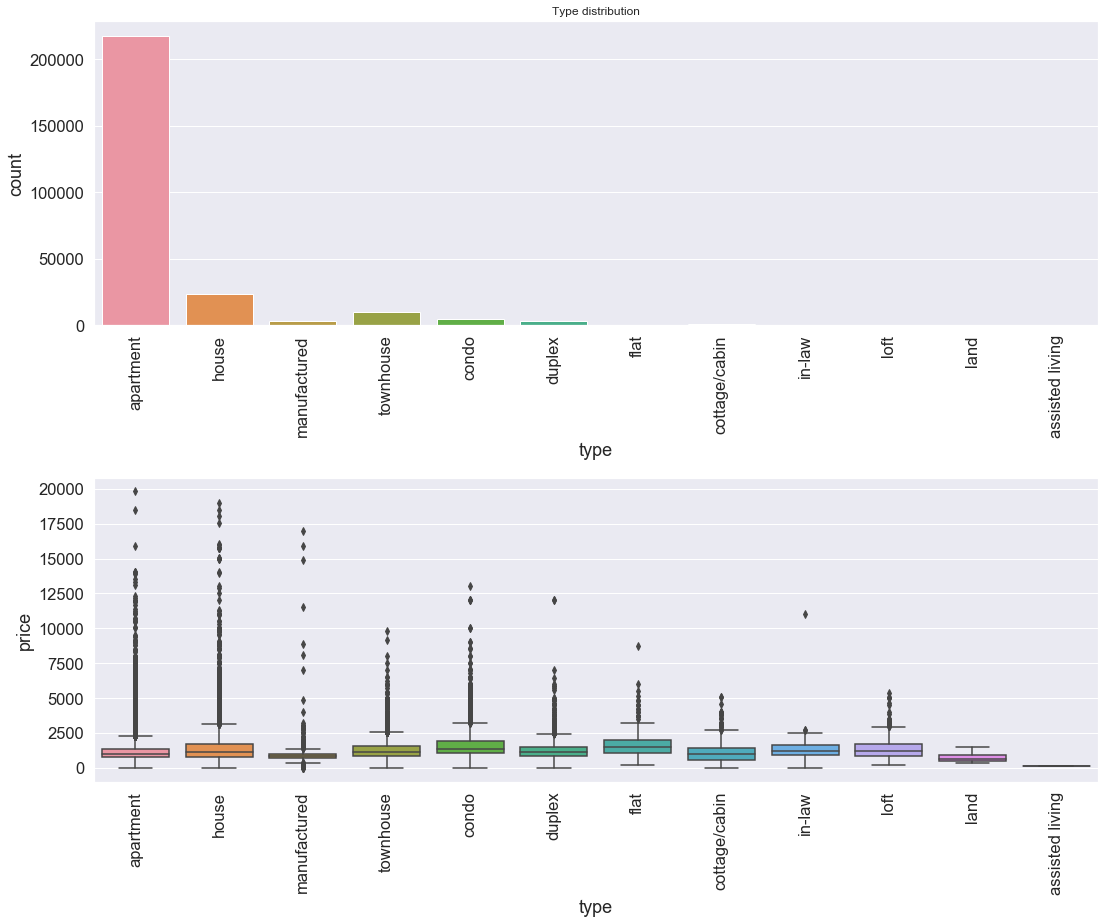

In [61]:
data = train[['type','price']]
data = data[data['price']<data['price'].quantile(0.9996)]
fig=plt.figure(figsize=(18,14))
plt.subplots_adjust(hspace=0.5)
ax1 = fig.add_subplot(211);
sns.countplot(data['type'])
plt.title('Type distribution',fontsize=12)
plt.xticks(rotation=90)
ax2 =fig.add_subplot(212);
sns.boxplot(x='type',y='price',data=data)
plt.xticks(rotation=90)
plt.show()

####  Analyzing parking_options Feature

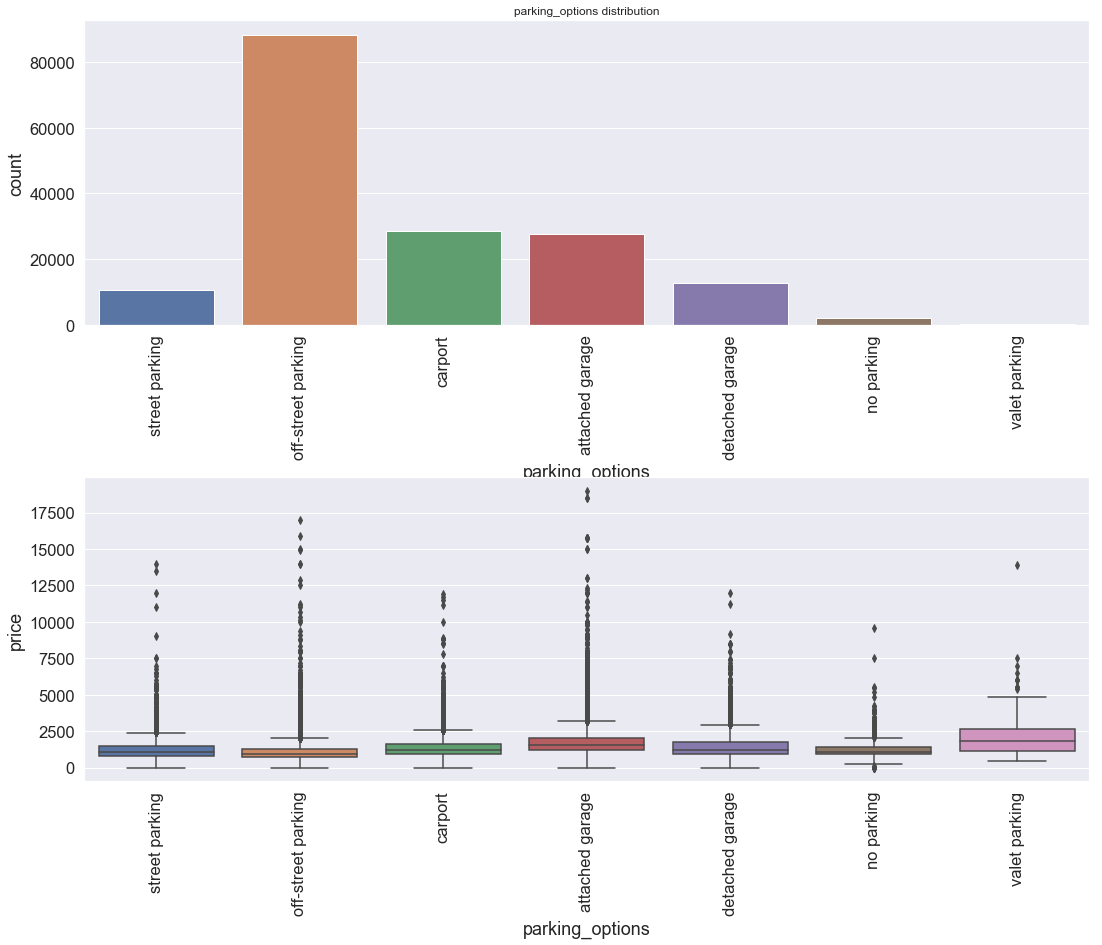

In [62]:
data = train[['parking_options','price']]
data = data[data['price']<data['price'].quantile(0.9996)]
fig=plt.figure(figsize=(18,14))
plt.subplots_adjust(hspace=0.5)
ax1 = fig.add_subplot(211);
sns.countplot(data['parking_options'])
plt.title('parking_options distribution',fontsize=12)
plt.xticks(rotation=90)
ax2 =fig.add_subplot(212);
sns.boxplot(x='parking_options',y='price',data=data)
plt.xticks(rotation=90)
plt.show()

####  Analyzing laundry_options Feature

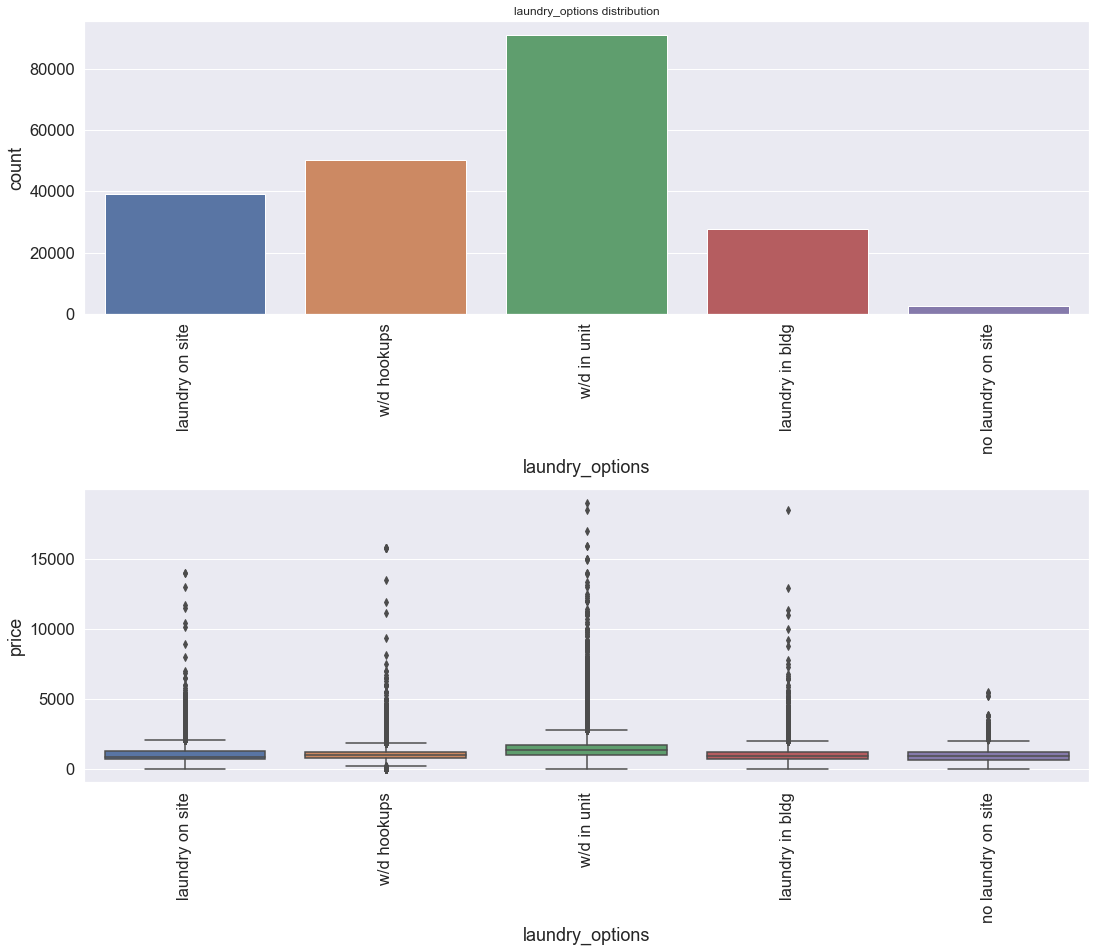

In [63]:
data = train[['laundry_options','price']]
data = data[data['price']<data['price'].quantile(0.9996)]
fig=plt.figure(figsize=(18,14))
plt.subplots_adjust(hspace=0.6)
ax1 = fig.add_subplot(211);
sns.countplot(data['laundry_options'])
plt.title('laundry_options distribution',fontsize=12)
plt.xticks(rotation=90)
ax2 =fig.add_subplot(212);
sns.boxplot(x='laundry_options',y='price',data=data)
plt.xticks(rotation=90)
plt.show()

####  Analyzing region Feature

catboost

In [64]:
train['region'].value_counts()

jacksonville               4246
rochester                  3677
fayetteville               3652
omaha / council bluffs     2727
denver                     2671
savannah / hinesville      2621
boulder                    2614
ventura county             2579
stockton                   2571
fort collins / north CO    2567
orlando                    2564
inland empire              2561
lincoln                    2550
reno / tahoe               2536
augusta                    2529
colorado springs           2522
jackson                    2521
space coast                2509
washington, DC             2502
tucson                     2466
minneapolis / st paul      2463
charlotte                  2455
sarasota-bradenton         2453
grand rapids               2406
st louis, MO               2391
orange county              2388
daytona beach              2388
sacramento                 2385
raleigh / durham / CH      2368
lakeland                   2357
                           ... 
mason ci

####  Analyzing state Feature

In [65]:
train['state'].value_counts()

ca    33085
fl    31929
nc    18628
mi    14529
ga    13841
co    11308
ny     9991
il     9706
ks     7910
ia     7488
mn     7468
md     7451
la     7304
az     6752
oh     6558
in     6416
al     6198
nj     5711
ky     5419
ms     4973
ma     4926
id     4466
ct     3765
nd     3428
ar     3149
nm     2917
nv     2846
ne     2697
dc     2502
ak     2169
mo     2158
de     2048
hi     1840
nh     1761
mt     1339
me      420
ok       49
or       44
Name: state, dtype: int64

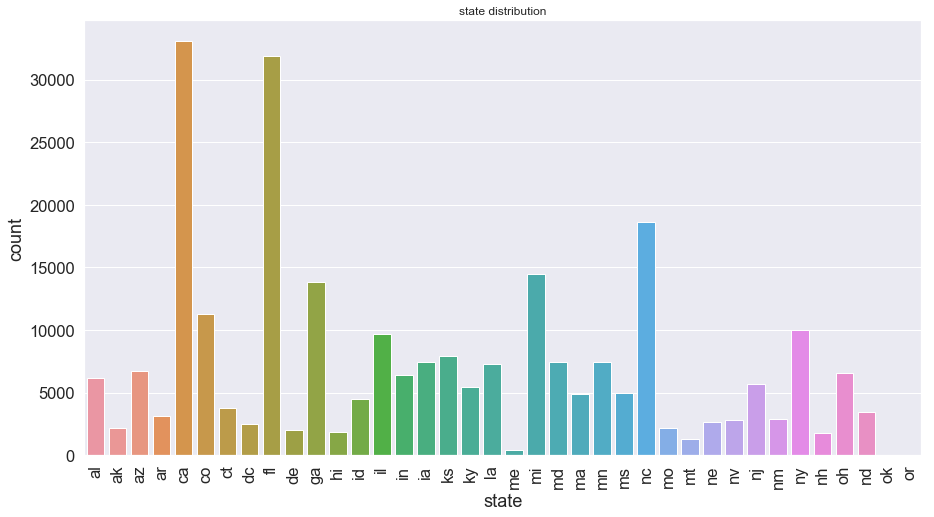

In [66]:
data = train[['state','price']].copy()
data = data[data['price']<data['price'].quantile(0.9996)]
plt.figure(figsize=(15,8))
sns.countplot(data['state'])
plt.title('state distribution',fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [67]:
data.loc[data['state']=='ga'].sort_values(by='price',ascending=False).head() # remove the outlier

,state,price
106522,ga,5999
105099,ga,4895
105160,ga,4822
106189,ga,4175
105589,ga,3754


In [68]:
data.drop(110953,inplace=True)
data.loc[data['state']=='ga'].sort_values(by='price',ascending=False).head()

KeyError: '[110953] not found in axis'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

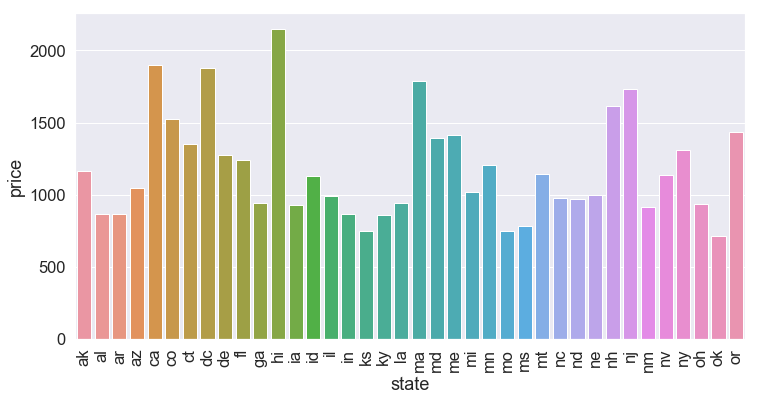

In [69]:
x=pd.DataFrame(data.groupby('state')['price'].mean()).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='state',y='price',data=x)
plt.xticks(rotation=90)

### Correlation heatmap

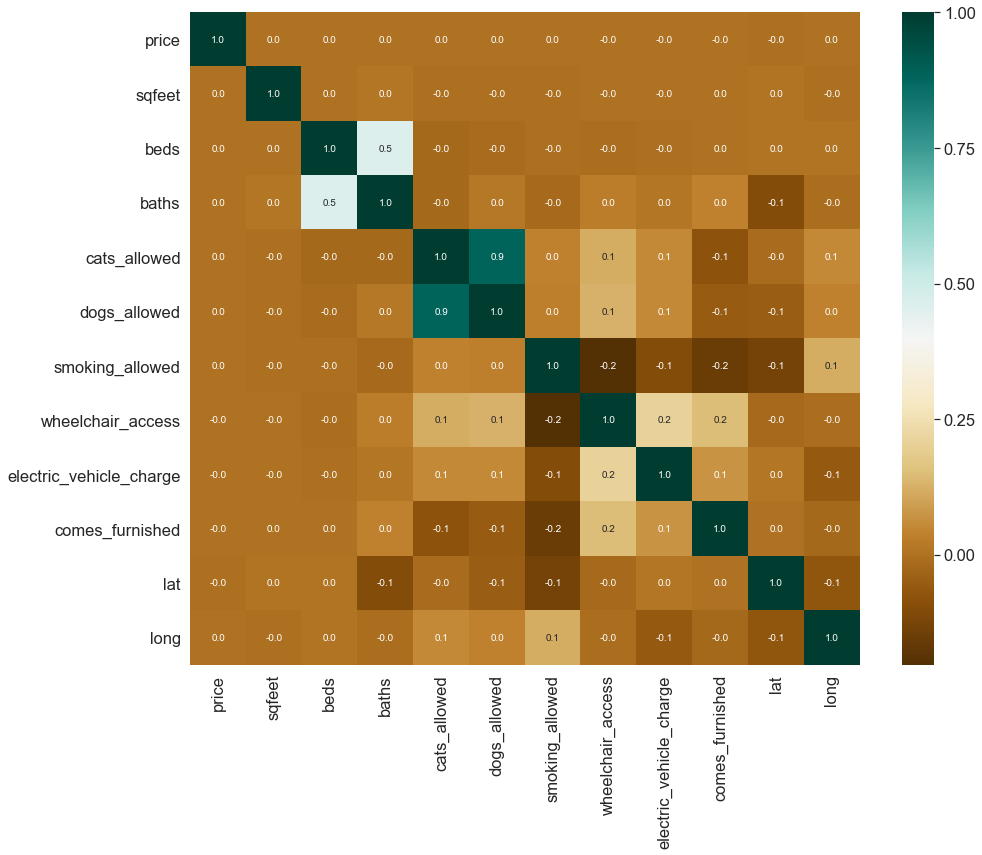

In [70]:
data=train.copy()
fig, ax = plt.subplots(figsize=(15,12))
corr= data.corr()
sns.heatmap(corr,annot=True,fmt='.1f',ax=ax,cmap='BrBG')
sns.set(font_scale=1.45)
plt.show()

From the above figure, it is evident that there is almost 0 correlations among the features. We will try to remove the outliers inorder to make features useful for our model

# Missing Data Handling


# Data Cleaning: Outlier Detection and Removal

In [71]:
#train=train[train['price']<train['price'].quantile(0.9996)]
#train=train[train['sqfeet']<train['sqfeet'].quantile(0.9996)]
#train.shape

In [72]:
train.drop(train.index[train['sqfeet']==0],inplace=True)
train.drop(train.index[train['price']==0],inplace=True)
train.shape

(264350, 21)

In [73]:
# create new feature price per sqfeet

In [74]:
train['pp_sqfeet'] = train['price'] / train['sqfeet']


In [75]:
train['pp_sqfeet'] = train['price'] / train['sqfeet']

print('Correlation with price: {:.3f}'.format(train['price'].corr(train['pp_sqfeet'])))

Correlation with price: 1.000


Text(0.5, 1.0, 'Skewness: 513.8385973359273 and Kurtosis: 264135.6265822259')

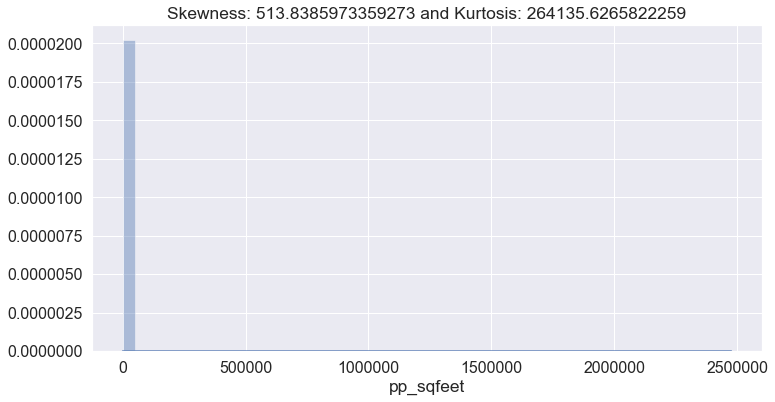

In [76]:
plt.figure(figsize=(12,6))

sns.distplot(train['pp_sqfeet'])
plt.title('Skewness: {} and Kurtosis: {}'.format(train['pp_sqfeet'].skew(),train['pp_sqfeet'].kurtosis()))

In [77]:
temp=pd.DataFrame(data.groupby('region')['pp_sqfeet'].mean()).reset_index()
temp


KeyError: 'Column not found: pp_sqfeet'

In [89]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('region'):
        m=np.mean(subdf.pp_sqfeet)
        st=np.std(subdf.pp_sqfeet)
        reduced_df = subdf[(subdf.pp_sqfeet > (m-st)) & (subdf.pp_sqfeet <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [90]:
data=train.copy()
data.shape

(264350, 22)

In [91]:
data=remove_pps_outliers(data)

In [92]:
data.shape

(251517, 22)

Correlation with price: 1.000
Correlation with price: 0.336


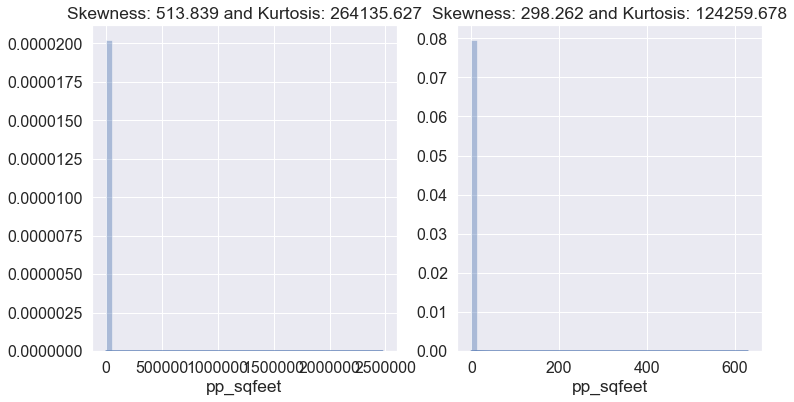

In [93]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121);
sns.distplot(train['pp_sqfeet'])
plt.title('Skewness: {:.3f} and Kurtosis: {:.3f}'.format(train['pp_sqfeet'].skew(),train['pp_sqfeet'].kurtosis()))

ax2=fig.add_subplot(122);
sns.distplot(data['pp_sqfeet'])
plt.title('Skewness: {:.3f} and Kurtosis: {:.3f}'.format(data['pp_sqfeet'].skew(),data['pp_sqfeet'].kurtosis()))

print('Correlation with price: {:.3f}'.format(train['price'].corr(train['pp_sqfeet'])))
print('Correlation with price: {:.3f}'.format(data['price'].corr(data['pp_sqfeet'])))

Correlation with price: 0.000
Correlation with price: 0.052


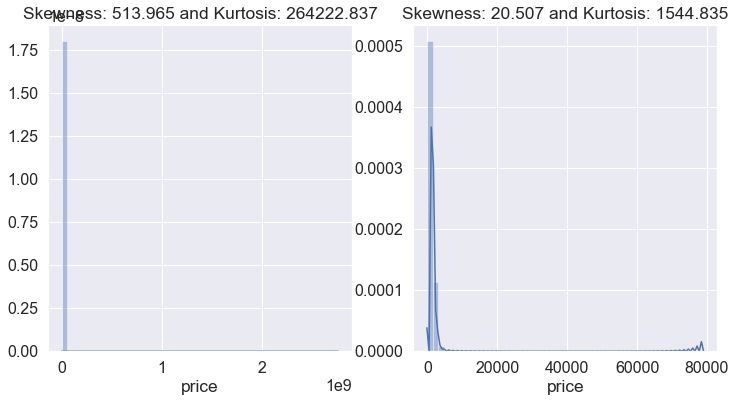

In [94]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121);
sns.distplot(train['price'])
plt.title('Skewness: {:.3f} and Kurtosis: {:.3f}'.format(train['price'].skew(),train['price'].kurtosis()))

ax2=fig.add_subplot(122);
sns.distplot(data['price'])
plt.title('Skewness: {:.3f} and Kurtosis: {:.3f}'.format(data['price'].skew(),data['price'].kurtosis()))

print('Correlation with price: {:.3f}'.format(train['price'].corr(train['sqfeet'])))
print('Correlation with price: {:.3f}'.format(data['price'].corr(data['sqfeet'])))

Text(0.5, 1.0, 'Skewness: 221.586 and Kurtosis: 50202.457')

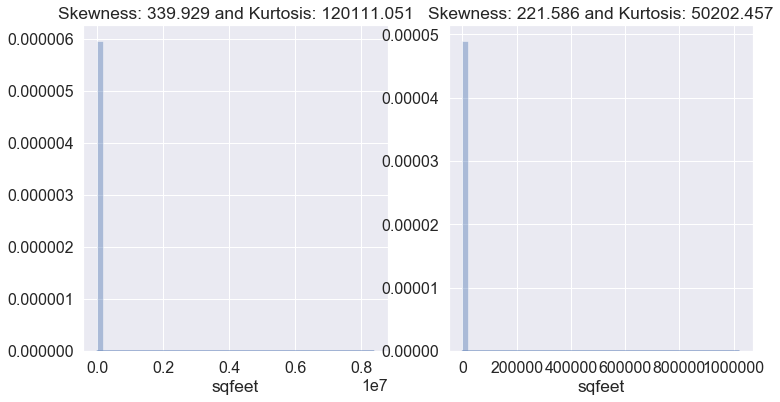

In [95]:
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121);
sns.distplot(train['sqfeet'])
plt.title('Skewness: {:.3f} and Kurtosis: {:.3f}'.format(train['sqfeet'].skew(),train['sqfeet'].kurtosis()))

ax2=fig.add_subplot(122);
sns.distplot(data['sqfeet'])
plt.title('Skewness: {:.3f} and Kurtosis: {:.3f}'.format(data['sqfeet'].skew(),data['sqfeet'].kurtosis()))


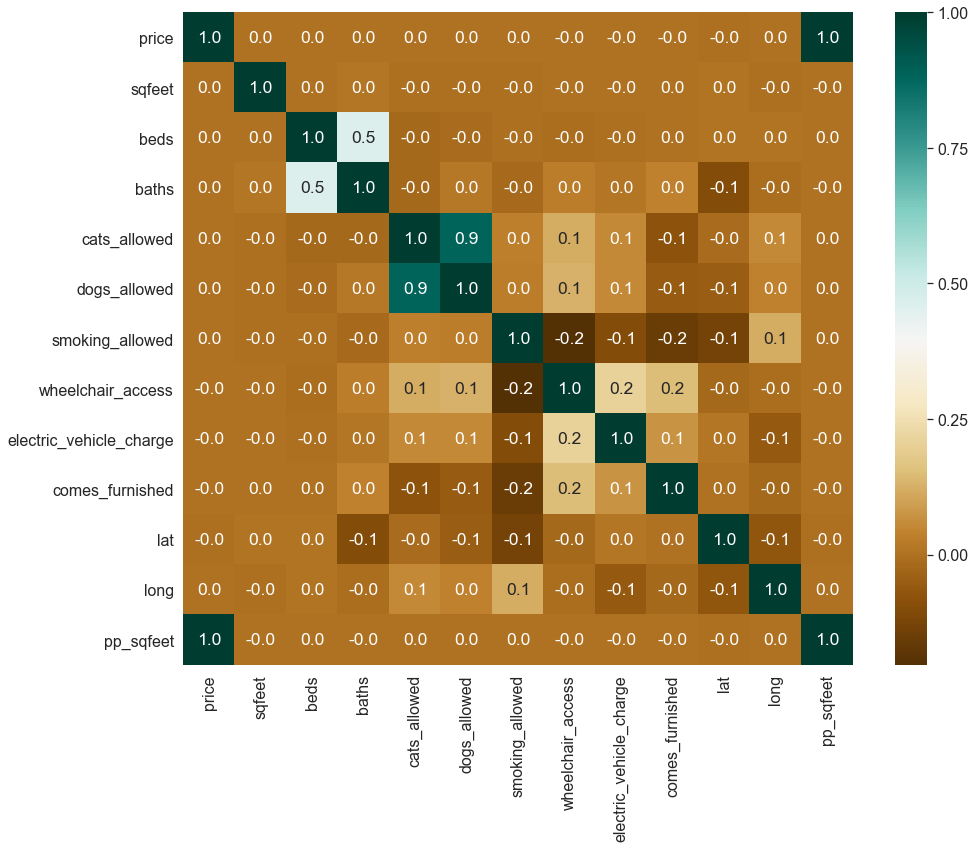

In [96]:
fig, ax = plt.subplots(figsize=(15,12))
corr= train.corr()
sns.heatmap(corr,annot=True,fmt='.1f',ax=ax,cmap='BrBG')
sns.set(font_scale=1.45)
plt.show()

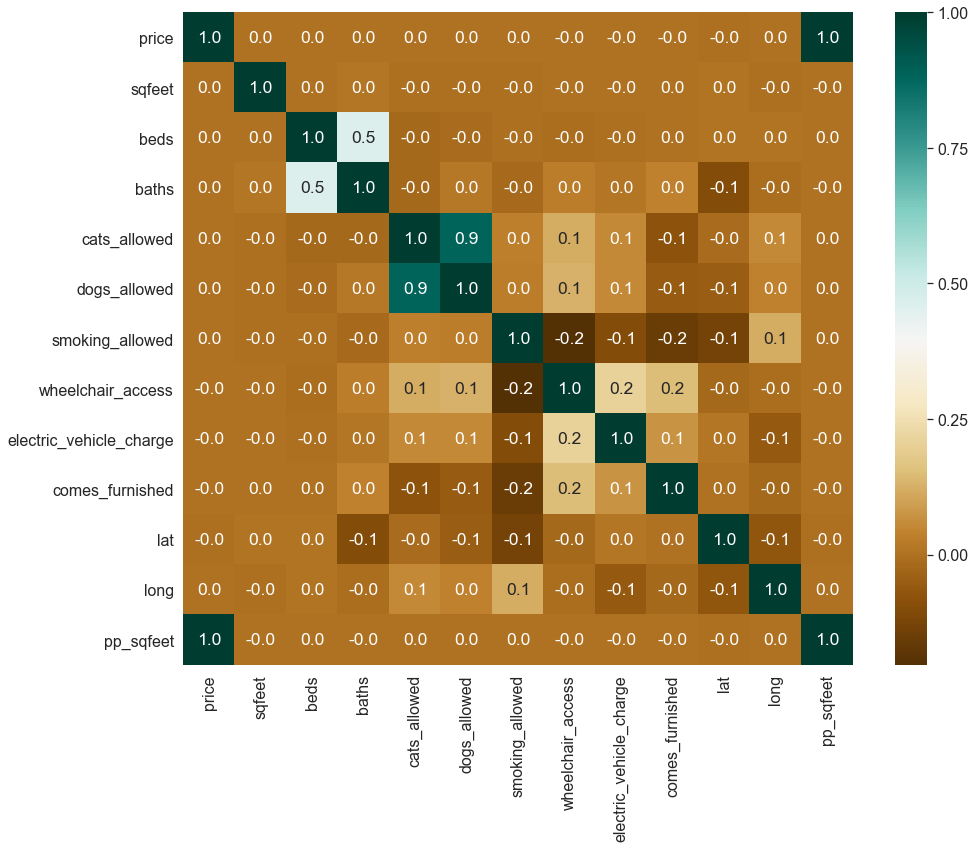

In [99]:
fig, ax = plt.subplots(figsize=(15,12))
corr= train.corr()
sns.heatmap(corr,annot=True,fmt='.1f',ax=ax,cmap='BrBG')
sns.set(font_scale=1.45)
plt.show()

In [98]:
train.columns

Index(['url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state', 'pp_sqfeet'],
      dtype='object')